# Simple Moving Average

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df: pd.DataFrame = pd.read_pickle("../../data/demo.pkl")
stock_price = df[["Close"]]
stock_price

,Close
Date,
2017-11-02,42.027500
2017-11-03,43.125000
2017-11-06,43.562500
2017-11-07,43.702499
2017-11-08,44.060001
...,...
2022-10-26,149.350006
2022-10-27,144.800003
2022-10-28,155.740005


## Long and Short-Term Simple Moving Averages

For each day, we need to compute the average stock price within a period of time before that day. To do so, we need to *slide* a fixed length window (hence the name *moving* average) along the times series and compute the mean value of the prices falling into the window. Panda's `DataFrame` (or `Series`) has a method `rolling`, which can achieve this easily.

Compute the long and short-term moving averages, respectively:

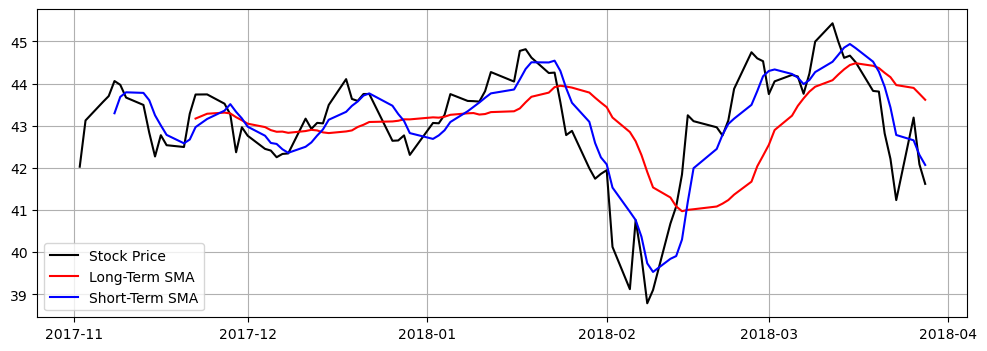

In [9]:
long_period = 15
short_period = 5
long = stock_price.rolling(long_period).mean()
short = stock_price.rolling(short_period).mean()

# plot stock price, long-term SMA and short-term SMA of the first 100 days
num_days = 100
plt.figure(figsize=(12, 4))
plt.plot(stock_price[:num_days], label="Stock Price", color="k")
plt.plot(long[:num_days], label="Long-Term SMA", color="r")
plt.plot(short[:num_days], label="Short-Term SMA", color="b")
plt.legend()
plt.grid()
plt.show()

## Golden Cross vs. Death Cross

The **golden cross** 
- appears when the short-term MA crosses *up* through the long-term MA, and
- it indicates a *buy* signal.

The **death cross** 
- appears when the short-term MA crosses trends *down* and crosses the long-term MA, and
- it indicates a *sell* signal.

We can use *bitwise* operations to find golden and death crosses. By definition, we note that a golden cross occurs when 
- short-term MA > long-term MA on current day, and
- short-term MA < long-term MA on the preceding day.

In code:
```py
(short > long) & ((short < long).shift(1))
```

The death crosses can be found in the similar way.

In [17]:
golden = ((short > long) & ((short < long).shift(1))).query("Close == True").index
death = ((short < long) & ((short > long).shift(1))).query("Close == True").index

print(f"Golden cross: {golden}")
print(f"Death cross: {death}")

Golden cross: DatetimeIndex(['2017-11-27', '2017-12-14', '2018-01-08', '2018-02-15',
               '2018-04-09', '2018-05-04', '2018-07-06', '2018-09-27',
               '2019-01-15', '2019-06-07', '2019-08-16', '2019-09-04',
               '2019-10-01', '2019-12-10', '2020-02-07', '2020-03-31',
               '2020-07-31', '2020-09-30', '2020-11-09', '2020-12-02',
               '2021-01-21', '2021-03-16', '2021-03-26', '2021-04-05',
               '2021-05-26', '2021-06-09', '2021-08-05', '2021-08-13',
               '2021-10-15', '2021-11-17', '2022-02-02', '2022-03-21',
               '2022-05-31', '2022-06-27', '2022-10-19'],
              dtype='datetime64[ns]', name='Date', freq=None)
Death cross: DatetimeIndex(['2017-12-01', '2017-12-28', '2018-01-25', '2018-03-20',
               '2018-04-23', '2018-06-18', '2018-09-13', '2018-10-10',
               '2019-05-09', '2019-08-05', '2019-08-29', '2019-09-26',
               '2019-12-04', '2020-02-05', '2020-02-24', '2020-07-24',
 

Plot the golden and death crosses:

```{note}
For empty values, we use `np.nan` instead of `pd.NA` so that they will be ignored when plotting, which is as desired. Otherwise, an error will occur.
```

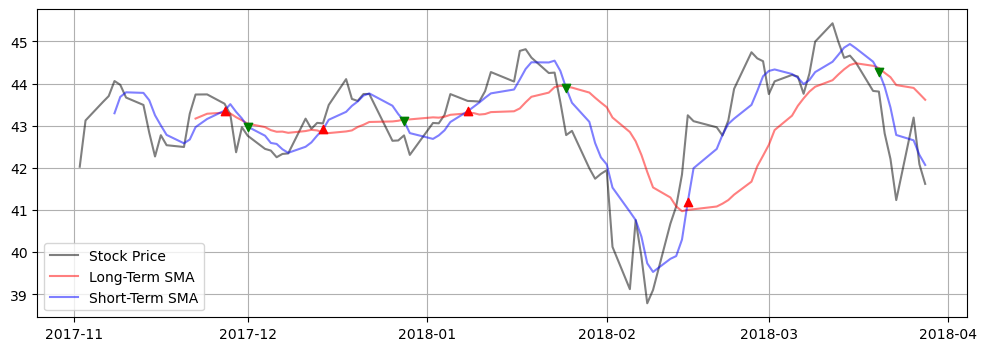

In [11]:
# the data frame `buy_sell_df` is just for plotting
# we don't need it for making decisions
buy_sell_df = stock_price.copy()
buy_sell_df["Buy"] = np.nan # use `np.nan` instead of `pd.NA`
buy_sell_df["Sell"] = np.nan
buy_sell_df.loc[golden, "Buy"] = short.loc[golden, "Close"]
buy_sell_df.loc[death, "Sell"] = short.loc[death, "Close"]

# plot first 100 days
num_days = 100
plt.figure(figsize=(12, 4))
plt.plot(stock_price[:num_days], label="Stock Price", color="k", alpha=0.5)
plt.plot(long[:num_days], label="Long-Term SMA", color="r", alpha=0.5)
plt.plot(short[:num_days], label="Short-Term SMA", color="b", alpha=0.5)
plt.scatter(buy_sell_df[:num_days].index, buy_sell_df[:num_days]["Buy"], marker="^", color="r", zorder=2)
plt.scatter(buy_sell_df[:num_days].index, buy_sell_df[:num_days]["Sell"], marker="v", color="g", zorder=2)
plt.legend()
plt.grid()
plt.show()